# Projeto - Análise Exploratória dos Dados
__Equipe:__
<br>
Janaina Oliveira

__Definição do Conjunto de Dados:__ 

O projeto foi desenvolvido utilizando o Conjunto de Dados de Informações Globais por País de 2023. Este conjunto abrangente oferece uma vasta gama de informações sobre todos os países do mundo, cobrindo uma ampla gama de indicadores e atributos. Ele engloba estatísticas demográficas, indicadores econômicos, fatores ambientais, métricas de saúde, estatísticas de educação e muito mais. Com cada país representado, esse conjunto de dados oferece uma perspectiva global completa sobre vários aspectos das nações, permitindo análises aprofundadas e comparações entre países.

Disponivel: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023?select=world-data-2023.csv

__Importação das bibliotecas__

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

__Importação dos dados__

In [2]:
# Base de dados de informações globais por país de 2023
df = pd.read_csv('world-data-2023.csv')

__Exploração dos dados__

In [3]:
# Visualizar todos os dados
df.head(195)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [4]:
# Verificar as informações sobre as colunas e os tipos de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [5]:
# Transformar os dados numericos com tipo object (string) para float 
var_num = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

# Loop para verificar e alterar o tipo de cada variável
for variable in var_num:
    if (df[variable].dtypes == 'object'):
        df[variable] = df[variable].str.replace(',', '')
        df[variable] = df[variable].str.replace('%', '')
        df[variable] = df[variable].str.replace('$', '')
        df[variable] = df[variable].astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    float64
 4   Land Area(Km2)                             194 non-null    float64
 5   Armed Forces size                          171 non-null    float64
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    float64
 10  CPI                       

In [6]:
# Verificar a quantidade de dados NaN
data_null = df.isnull().sum()
print(data_null)

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [7]:
# Resumo estatístico das variáveis numéricas
print(df.describe())

       Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
count        195.000000             188.000000    1.940000e+02   
mean         356.764103              39.117553    6.896244e+05   
std         1982.888967              21.783052    1.921609e+06   
min            2.000000               0.600000    0.000000e+00   
25%           35.500000              21.700000    2.382825e+04   
50%           89.000000              39.600000    1.195110e+05   
75%          216.500000              55.375000    5.242560e+05   
max        26337.000000              82.600000    1.709824e+07   

       Armed Forces size  Birth Rate  Calling Code  Co2-Emissions  \
count       1.710000e+02  189.000000    194.000000   1.880000e+02   
mean        1.592749e+05   20.214974    360.546392   1.777992e+05   
std         3.806288e+05    9.945774    323.236419   8.387903e+05   
min         0.000000e+00    5.900000      1.000000   1.100000e+01   
25%         1.100000e+04   11.300000     82.500000   2.30425

In [8]:
# Imprimindo nome dos países e abreviações
print(df[['Country', 'Abbreviation']])

         Country Abbreviation
0    Afghanistan           AF
1        Albania           AL
2        Algeria           DZ
3        Andorra           AD
4         Angola           AO
..           ...          ...
190    Venezuela           VE
191      Vietnam           VN
192        Yemen           YE
193       Zambia           ZM
194     Zimbabwe           ZW

[195 rows x 2 columns]


In [9]:
# Corrigindo à codificação de caracteres substituindo o nome incorreto por "São Tomé e Príncipe"
df['Country'] = df['Country'].replace("S�����������", "São Tomé e Príncipe")

# Exibir o DataFrame após a substituição
print(df['Country'])


0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
190      Venezuela
191        Vietnam
192          Yemen
193         Zambia
194       Zimbabwe
Name: Country, Length: 195, dtype: object


In [10]:
# Verificar se há valores NaN na coluna de abreviatura
df_abbreviation = df[df['Abbreviation'].isna()]

# Exibir as linhas que contêm valores NaN na coluna de abreviatura
print(df_abbreviation[['Country', 'Abbreviation']])

                            Country Abbreviation
39            Republic of the Congo          NaN
56                         Eswatini          NaN
73                     Vatican City          NaN
81              Republic of Ireland          NaN
119                         Namibia          NaN
128                 North Macedonia          NaN
133  Palestinian National Authority          NaN


In [11]:
# Corrigir os valores NaN na coluna de abreviação
# Criar um dicionário com os nomes dos países e suas abreviações
abbreviation_dict = {
    'Republic of the Congo': 'RC',
    'Eswatini': 'EZ',
    'Vatican City': 'VC',
    'Republic of Ireland': 'IR',
    'Namibia': 'NA',
    'North Macedonia': 'NM',
    'Palestinian National Authority': 'PA'
}

# Atualizar os valores na coluna de abreviação usando o dicionário
for country, abbreviation in abbreviation_dict.items():
    df.loc[df['Country'] == country, 'Abbreviation'] = abbreviation

# Exibir o DataFrame atualizado
print(df[['Country', 'Abbreviation']])


         Country Abbreviation
0    Afghanistan           AF
1        Albania           AL
2        Algeria           DZ
3        Andorra           AD
4         Angola           AO
..           ...          ...
190    Venezuela           VE
191      Vietnam           VN
192        Yemen           YE
193       Zambia           ZM
194     Zimbabwe           ZW

[195 rows x 2 columns]


In [12]:
# Verificar se há valores NaN na coluna de Land Area(Km2)
df_agricultural = df[df['Agricultural Land( %)'].isna()]

# Exibir as linhas que contêm valores NaN na coluna de área agrícola
print(df_agricultural[['Country', 'Agricultural Land( %)']])


                            Country  Agricultural Land( %)
56                         Eswatini                    NaN
73                     Vatican City                    NaN
113                          Monaco                    NaN
120                           Nauru                    NaN
128                 North Macedonia                    NaN
133  Palestinian National Authority                    NaN
163                     South Sudan                    NaN


Esses países serão removidos, pois não tem muitas informações a respeito deles. Dessa forma, não interfere na análise final.

In [13]:
# Remover os países que contêm valores NaN na coluna de área agrícola
df = df.dropna(subset=['Agricultural Land( %)'])

# Exibir o DataFrame após a remoção das linhas
print(df[['Country', 'Agricultural Land( %)']])


         Country  Agricultural Land( %)
0    Afghanistan                   58.1
1        Albania                   43.1
2        Algeria                   17.4
3        Andorra                   40.0
4         Angola                   47.5
..           ...                    ...
190    Venezuela                   24.5
191      Vietnam                   39.3
192        Yemen                   44.6
193       Zambia                   32.1
194     Zimbabwe                   41.9

[188 rows x 2 columns]


In [14]:
# Verificar se há valores NaN na coluna de tamanho das forças armadas (Armed Forces size)
df_armed_forces = df[df['Armed Forces size'].isna()]

# Exibir as linhas que contêm valores NaN na coluna de tamanho das forças armadas
print(df_armed_forces[['Country', 'Armed Forces size']])


                              Country  Armed Forces size
3                             Andorra                NaN
38                            Comoros                NaN
48                           Dominica                NaN
67                            Grenada                NaN
89                           Kiribati                NaN
98                      Liechtenstein                NaN
107                  Marshall Islands                NaN
111    Federated States of Micronesia                NaN
132                             Palau                NaN
145             Saint Kitts and Nevis                NaN
146                       Saint Lucia                NaN
147  Saint Vincent and the Grenadines                NaN
148                             Samoa                NaN
149                        San Marino                NaN
159                   Solomon Islands                NaN
176                             Tonga                NaN
181                            

Alguns países contam com acordos de defesa firmados com outras nações ou organizações internacionais para garantir sua segurança, enquanto outros podem apresentar forças armadas muito pequenas devido a fatores como a dimensão populacional reduzida, recursos limitados ou outras circunstâncias específicas. Diante disso, os valores NaN na coluna de tamanho das forças armadas será preenchido com 0.

In [15]:
# Preencher os valores NaN com 0
df['Armed Forces size'].fillna(0, inplace=True)

In [16]:
print(df['Armed Forces size'].isna().sum())

0


In [17]:
# Classificar os países com base no tamanho de suas Forças Armadas
sorted_countries_armed = df.sort_values(by='Armed Forces size', ascending=False)

In [18]:
# Selecionar os 10 países com os maiores tamanhos de Forças Armadas
top_10_armed_force_countries = sorted_countries_armed.head(10)

# Exibir os resultados
print(top_10_armed_force_countries[['Country', 'Armed Forces size']])

           Country  Armed Forces size
77           India          3031000.0
36           China          2695000.0
127    North Korea          1469000.0
143         Russia          1454000.0
186  United States          1359000.0
131       Pakistan           936000.0
51           Egypt           836000.0
23          Brazil           730000.0
78       Indonesia           676000.0
162    South Korea           634000.0


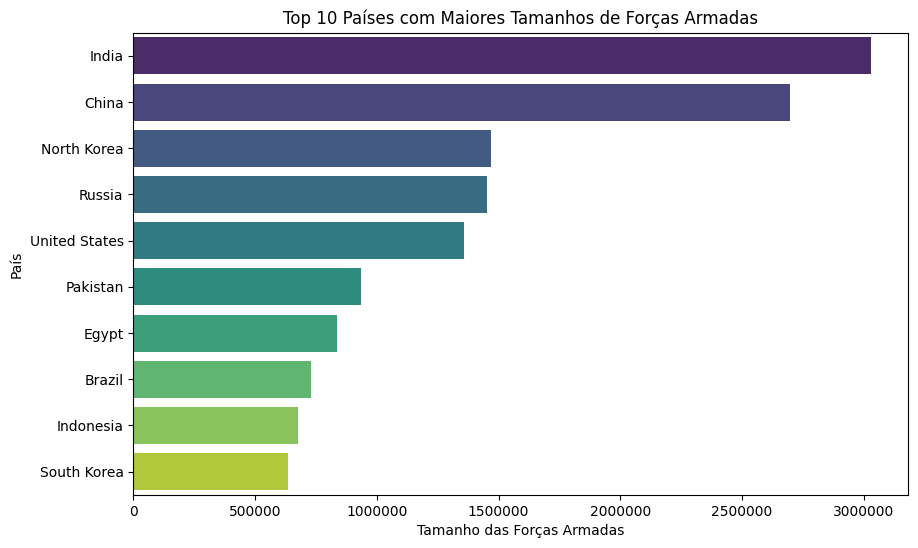

In [19]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Armed Forces size', y='Country', data=top_10_armed_force_countries, palette='viridis')
plt.xlabel('Tamanho das Forças Armadas')
plt.ylabel('País')
plt.title('Top 10 Países com Maiores Tamanhos de Forças Armadas')

# Ajustar o eixo x para exibir valores mais legíveis
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [20]:
# Calcular média, soma e variância
mean_armed_forces = top_10_armed_force_countries['Armed Forces size'].mean()
total_armed_forces = top_10_armed_force_countries['Armed Forces size'].sum()
variance_armed_forces = top_10_armed_force_countries['Armed Forces size'].var()

print('Média das forças armadas: ', mean_armed_forces)
print('Soma total das forças armadas: ', total_armed_forces)
print('Variância das forças armadas', variance_armed_forces)

Média das forças armadas:  1382000.0
Soma total das forças armadas:  13820000.0
Variância das forças armadas 715169777777.7778


In [21]:
# Classificar os países com base no tamanho de sua População
sorted_countries_population = df.sort_values(by='Population', ascending=False)

In [22]:
# Selecionar os 10 países com as maiores população
top_10_population = sorted_countries_population.head(10)

# Exibir os resultados
print(top_10_population[['Country', 'Population']])

           Country    Population
36           China  1.397715e+09
77           India  1.366418e+09
186  United States  3.282395e+08
78       Indonesia  2.702039e+08
131       Pakistan  2.165653e+08
23          Brazil  2.125594e+08
126        Nigeria  2.009636e+08
13      Bangladesh  1.673108e+08
143         Russia  1.443735e+08
85           Japan  1.262266e+08


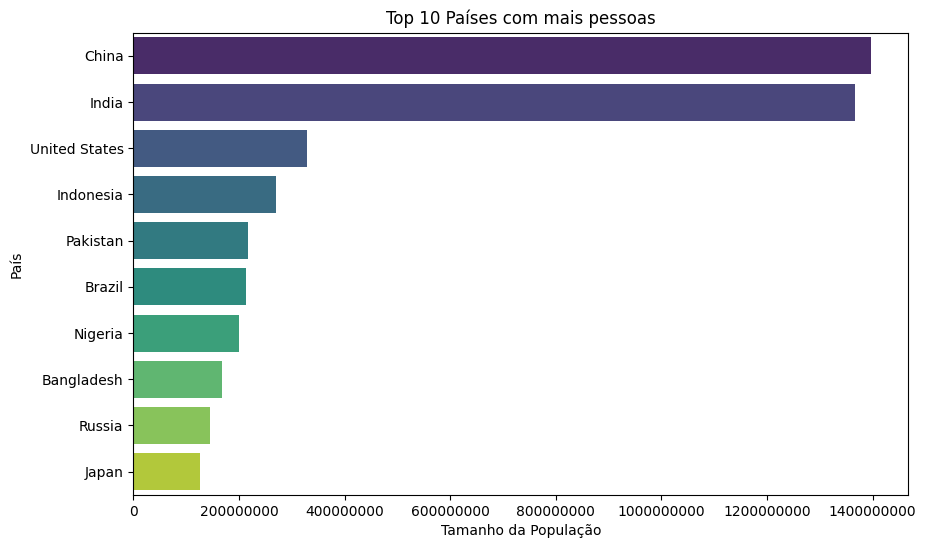

In [23]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Population', y='Country', data=top_10_population, palette='viridis')
plt.xlabel('Tamanho da População')
plt.ylabel('País')
plt.title('Top 10 Países com mais pessoas')

# Ajustar o eixo x para exibir valores mais legíveis
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [24]:
plt = px.scatter(df, x="Population", y="Armed Forces size", color = "Armed Forces size",
                 trendline="ols", trendline_options=dict(log_x=True), color_continuous_scale="Spectral",hover_data=df[['Country']])

plt.show()

In [25]:
# Calcular média, soma e variância
mean_population = top_10_population['Population'].mean()
total_population = top_10_population['Population'].sum()
variance_population = top_10_population['Population'].var()

print('Média da população: ', mean_population)
print('Soma total da população: ', total_population)
print('Variância da população', variance_population)

Média da população:  443057546.9
Soma total da população:  4430575469.0
Variância da população 2.4841048151899213e+17


In [26]:
# Selecionando alguns dados da Coreia do Norte
birth_rate_north_korea = df.loc[df['Country'] == 'North Korea', 'Birth Rate']
population_north_korea = df.loc[df['Country'] == 'North Korea', 'Population']
armed_forces_north_korea = df.loc[df['Country'] == 'North Korea', 'Armed Forces size']

print(birth_rate_north_korea)
print(population_north_korea)
print(armed_forces_north_korea)

127    13.89
Name: Birth Rate, dtype: float64
127    25666161.0
Name: Population, dtype: float64
127    1469000.0
Name: Armed Forces size, dtype: float64


Aqui podemos observar que em países onde o alistamento militar é obrigatório, a relação entre a população e as forças armadas é bastante próxima, especialmente quando se desconsidera a população feminina, que geralmente não é obrigada a se alistar. No entanto, há uma exceção notável: a Coreia do Norte, onde o alistamento militar é obrigatório para ambos os sexos. Por esse motivo, a Coreia do Norte figura entre os países com um grande contingente militar, apesar de não estar entre os mais populosos, dado que sua taxa de natalidade é relativamente baixa.

In [27]:
# Verificar se há valores NaN na coluna de Total tax rate
df_total_tax = df[df['Gasoline Price'].isna()]

# Exibir as linhas que contêm valores NaN na coluna de Total tax rate
print(df_total_tax[['Country', 'Gasoline Price']])

                              Country  Gasoline Price
38                            Comoros             NaN
48                           Dominica             NaN
53                  Equatorial Guinea             NaN
70                      Guinea-Bissau             NaN
89                           Kiribati             NaN
111    Federated States of Micronesia             NaN
132                             Palau             NaN
145             Saint Kitts and Nevis             NaN
147  Saint Vincent and the Grenadines             NaN
149                        San Marino             NaN
150               São Tomé e Príncipe             NaN
154                        Seychelles             NaN
159                   Solomon Islands             NaN
176                             Tonga             NaN
181                            Tuvalu             NaN


In [28]:
# Preencher os valores NaN com 0
df['Gasoline Price'].fillna(0, inplace=True)

In [29]:
print(df['Gasoline Price'].isna().sum())

0


In [30]:
# Classificar os países com base no Preço da Gasolina
sorted_countries_gasoline = df.sort_values(by='Gasoline Price', ascending=False)

In [31]:
# Selecionar os 10 países com os maiores preços de gasolina
top_10_gasoline = sorted_countries_gasoline.head(10)

# Exibir os resultados
print(top_10_gasoline[['Country', 'Gasoline Price']])

           Country  Gasoline Price
54         Eritrea            2.00
14        Barbados            1.81
129         Norway            1.78
98   Liechtenstein            1.74
76         Iceland            1.69
122    Netherlands            1.68
104       Maldives            1.63
83           Italy            1.61
82          Israel            1.57
46         Denmark            1.55


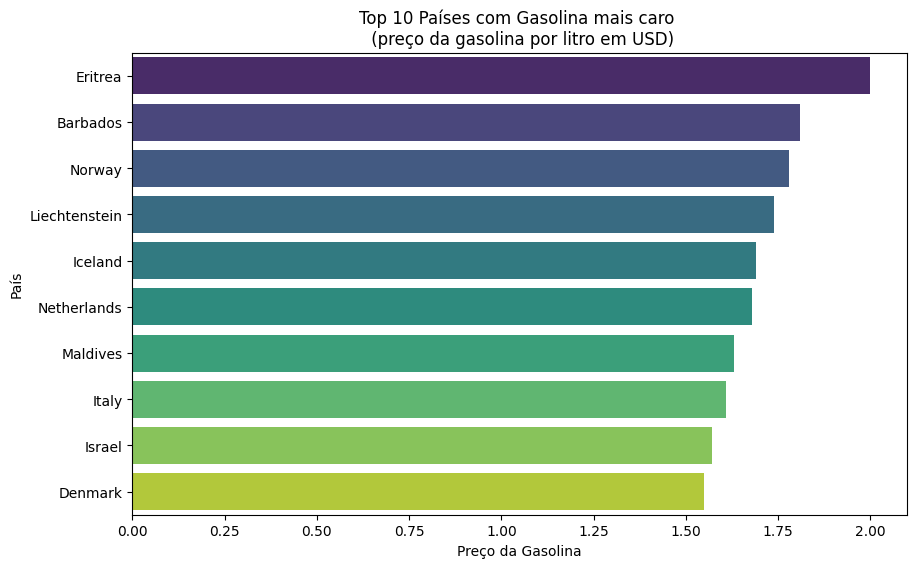

In [34]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Gasoline Price', y='Country', data=top_10_gasoline, palette='viridis')
plt.xlabel('Preço da Gasolina')
plt.ylabel('País')
plt.title('Top 10 Países com Gasolina mais caro \n (preço da gasolina por litro em USD)')

# Ajustar o eixo x para exibir valores mais legíveis
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [ ]:
# Calcular média, soma e variância
mean_gasoline_price = top_10_gasoline['Gasoline Price'].mean()
total_gasoline_price = top_10_gasoline['Gasoline Price'].sum()
variance_gasoline_price = top_10_gasoline['Gasoline Price'].var()

print('Média da população: ', mean_gasoline_price)
print('Soma total da população: ', total_gasoline_price)
print('Variância da população', variance_gasoline_price)

Média da população:  1.7060000000000002
Soma total da população:  17.060000000000002
Variância da população 0.018071111111111107


In [ ]:
# Encontrar o índice da linha correspondente ao Brasil
brazil_index = df[df['Country'] == 'Brazil'].index[0]

# Selecionar apenas os dados referentes ao Brasil
brazil_data = df.iloc[brazil_index]

# Exibir os dados referentes ao Brasil
print(brazil_data)

Country                                               Brazil
Density\n(P/Km2)                                        25.0
Abbreviation                                              BR
Agricultural Land( %)                                   33.9
Land Area(Km2)                                     8515770.0
Armed Forces size                                   730000.0
Birth Rate                                             13.92
Calling Code                                            55.0
Capital/Major City                                   Bras���
Co2-Emissions                                       462299.0
CPI                                                    167.4
CPI Change (%)                                           3.7
Currency-Code                                            BRL
Fertility Rate                                          1.73
Forested Area (%)                                       58.9
Gasoline Price                                          1.02
GDP                     

In [ ]:
# Encontrar o índice da linha correspondente à Suíça
suica_index = df[df['Country'] == 'Switzerland'].index[0]

# Selecionar apenas os dados referentes à Suíça
suica_data = df.iloc[suica_index]

# Exibir os dados referentes à Suíça
print(suica_data)

Country                                                Tonga
Density\n(P/Km2)                                       147.0
Abbreviation                                              TO
Agricultural Land( %)                                   45.8
Land Area(Km2)                                         747.0
Armed Forces size                                        0.0
Birth Rate                                              24.3
Calling Code                                           676.0
Capital/Major City                                  Nuku����
Co2-Emissions                                          128.0
CPI                                                   121.09
CPI Change (%)                                           7.4
Currency-Code                                            TOP
Fertility Rate                                          3.56
Forested Area (%)                                       12.5
Gasoline Price                                           NaN
GDP                     

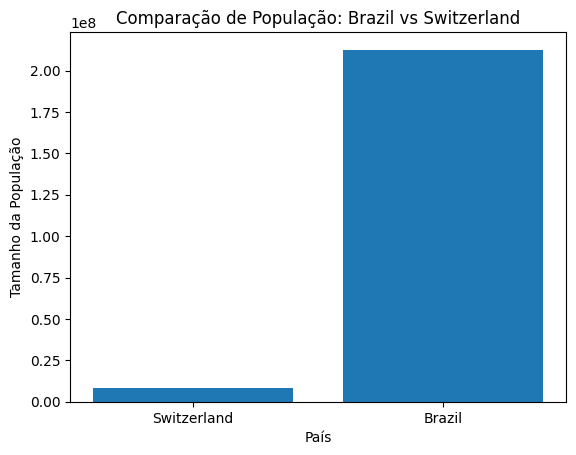

In [ ]:
# Selecionar os dados do Brasil e Suíça
switzerland_data = df[df['Country'] == 'Switzerland']
brazil_data = df[df['Country'] == 'Brazil']

# Comparar a população entre Brasil e Suíça
countries = ['Switzerland', 'Brazil']
populations = [switzerland_data['Population'].values[0], brazil_data['Population'].values[0]]

plt.bar(countries, populations)
plt.title('Comparação de População: Brazil vs Switzerland')
plt.xlabel('País')
plt.ylabel('Tamanho da População')
plt.show()

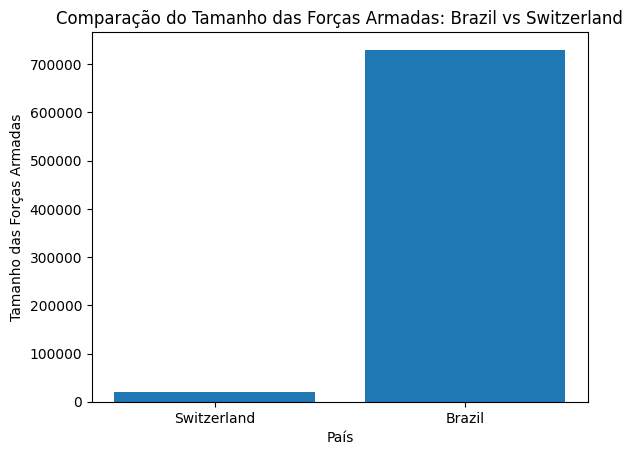

In [ ]:
# Selecionar os dados do Brasil e Suíça
switzerland_data = df[df['Country'] == 'Switzerland']
brazil_data = df[df['Country'] == 'Brazil']

# Comparar a população entre Brasil e Suíça
countries = ['Switzerland', 'Brazil']
populations = [switzerland_data['Armed Forces size'].values[0], brazil_data['Armed Forces size'].values[0]]

plt.bar(countries, populations)
plt.title('Comparação do Tamanho das Forças Armadas: Brazil vs Switzerland')
plt.xlabel('País')
plt.ylabel('Tamanho das Forças Armadas')
plt.show()

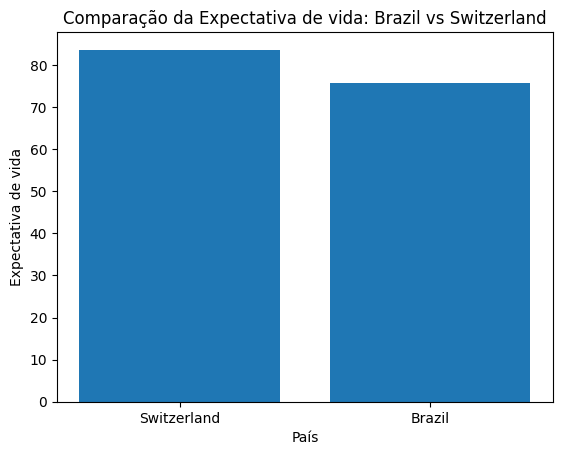

In [ ]:
# Selecionar os dados do Brasil e Suíça
switzerland_data = df[df['Country'] == 'Switzerland']
brazil_data = df[df['Country'] == 'Brazil']

# Comparar a população entre Brasil e Suíça
countries = ['Switzerland', 'Brazil']
populations = [switzerland_data['Life expectancy'].values[0], brazil_data['Life expectancy'].values[0]]

plt.bar(countries, populations)
plt.title('Comparação da Expectativa de vida: Brazil vs Switzerland')
plt.xlabel('País')
plt.ylabel('Expectativa de vida')
plt.show()

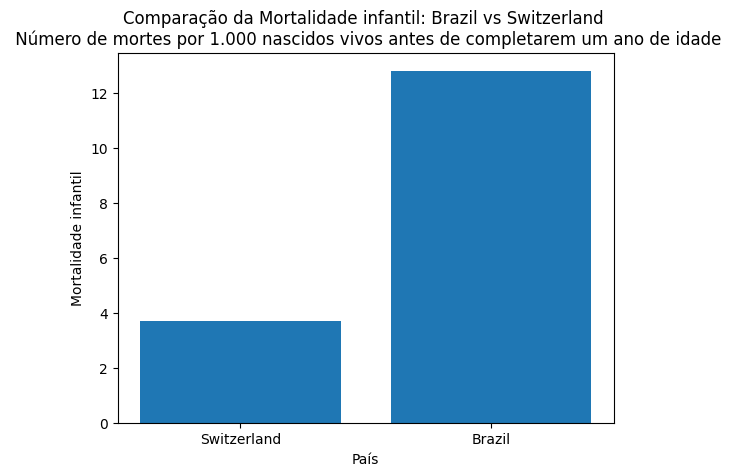

In [ ]:
# Selecionar os dados do Brasil e Suíça
switzerland_data = df[df['Country'] == 'Switzerland']
brazil_data = df[df['Country'] == 'Brazil']

# Comparar a população entre Brasil e Suíça
countries = ['Switzerland', 'Brazil']
populations = [switzerland_data['Infant mortality'].values[0], brazil_data['Infant mortality'].values[0]]

plt.bar(countries, populations)
plt.title('Comparação da Mortalidade infantil: Brazil vs Switzerland \n Número de mortes por 1.000 nascidos vivos antes de completarem um ano de idade')
plt.xlabel('País')
plt.ylabel('Mortalidade infantil')
plt.show()

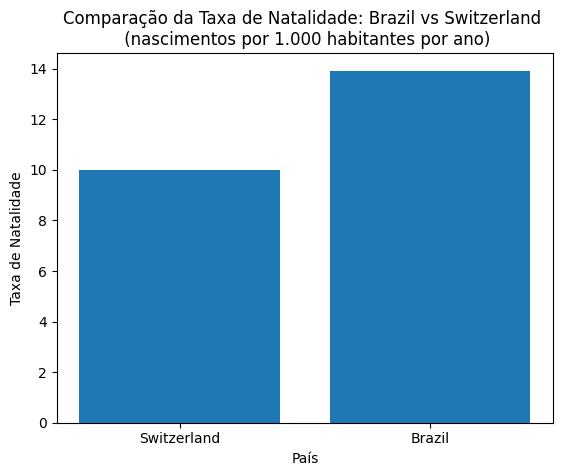

In [ ]:
# Selecionar os dados do Brasil e Suíça
switzerland_data = df[df['Country'] == 'Switzerland']
brazil_data = df[df['Country'] == 'Brazil']

# Comparar a população entre Brasil e Suíça
countries = ['Switzerland', 'Brazil']
populations = [switzerland_data['Birth Rate'].values[0], brazil_data['Birth Rate'].values[0]]

plt.bar(countries, populations)
plt.title('Comparação da Taxa de Natalidade: Brazil vs Switzerland \n (nascimentos por 1.000 habitantes por ano)')
plt.xlabel('País')
plt.ylabel('Taxa de Natalidade')
plt.show()

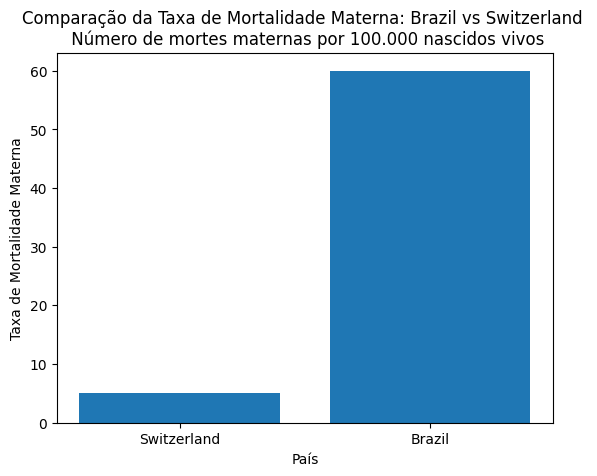

In [ ]:
# Selecionar os dados do Brasil e Suíça
switzerland_data = df[df['Country'] == 'Switzerland']
brazil_data = df[df['Country'] == 'Brazil']

# Comparar a população entre Brasil e Suíça
countries = ['Switzerland', 'Brazil']
populations = [switzerland_data['Maternal mortality ratio'].values[0], brazil_data['Maternal mortality ratio'].values[0]]

plt.bar(countries, populations)
plt.title('Comparação da Taxa de Mortalidade Materna: Brazil vs Switzerland \n Número de mortes maternas por 100.000 nascidos vivos')
plt.xlabel('País')
plt.ylabel('Taxa de Mortalidade Materna')
plt.show()

In [ ]:
# Verificar se há valores NaN na coluna de Total tax rate
df_total_tax = df[df['Total tax rate'].isna()]

# Exibir as linhas que contêm valores NaN na coluna de Total tax rate
print(df_total_tax[['Country', 'Total tax rate']])

          Country  Total tax rate
3         Andorra             NaN
42           Cuba             NaN
127   North Korea             NaN
160       Somalia             NaN
180  Turkmenistan             NaN
181        Tuvalu             NaN


In [ ]:
# Preencher os valores NaN com 0
df['Total tax rate'].fillna(0, inplace=True)

In [ ]:
print(df['Total tax rate'].isna().sum())

0


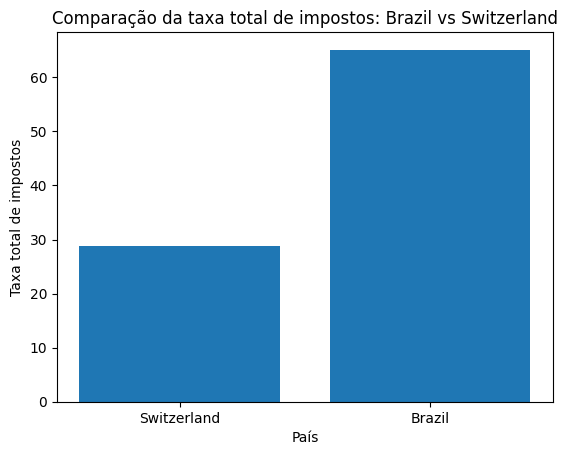

In [ ]:
# Selecionar os dados do Brasil e Suíça
switzerland_data = df[df['Country'] == 'Switzerland']
brazil_data = df[df['Country'] == 'Brazil']

# Comparar a população entre Brasil e Suíça
countries = ['Switzerland', 'Brazil']
populations = [switzerland_data['Total tax rate'].values[0], brazil_data['Total tax rate'].values[0]]

plt.bar(countries, populations)
plt.title('Comparação da Taxa Total de Impostos: Brazil vs Switzerland')
plt.xlabel('País')
plt.ylabel('Taxa total de impostos')
plt.show()

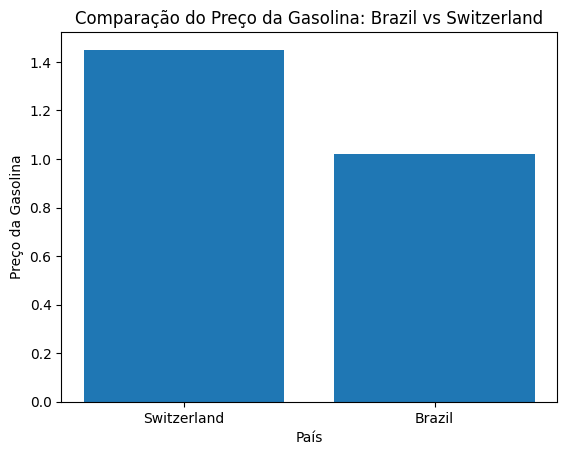

In [ ]:
# Selecionar os dados do Brasil e Suíça
switzerland_data = df[df['Country'] == 'Switzerland']
brazil_data = df[df['Country'] == 'Brazil']

# Comparar a população entre Brasil e Suíça
countries = ['Switzerland', 'Brazil']
populations = [switzerland_data['Gasoline Price'].values[0], brazil_data['Gasoline Price'].values[0]]

plt.bar(countries, populations)
plt.title('Comparação do Preço da Gasolina: Brazil vs Switzerland')
plt.xlabel('País')
plt.ylabel('Preço da Gasolina')
plt.show()

Algumas comparações entre dados do Brasil e Suíça no qual vermos a disparidade entre os dois países.